In [2]:
import pandas as pd


In [3]:
data=pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data=pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [6]:
data.shape

(200, 4)

In [7]:
import seaborn as sns
%matplotlib inline

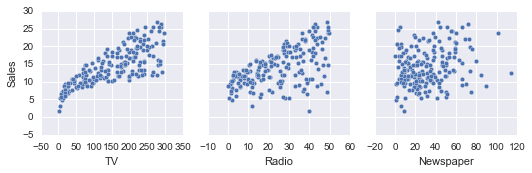

In [10]:
#visualize the realationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales")

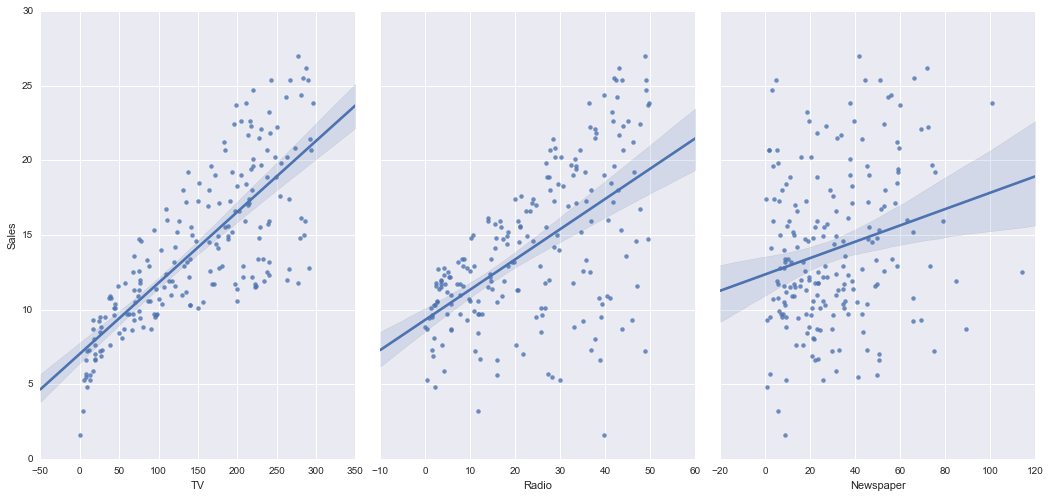

In [15]:
#visualize the realationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", size=7, aspect=0.7, kind="reg")

In [16]:
#create a python list of feature names
feature_cols=["TV", "Radio", "Newspaper"]
#use the list to select a subset of the original Dataframe (select specific columns in the original dataframe)
x=data[feature_cols]
#equivalent command to do this in one line
x=data[["TV", "Radio", "Newspaper"]]
x.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [18]:
print (type(x))
print (x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [19]:
y=data["Sales"]
#equivalent command if there are no spaces in the column name
y=data.Sales
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [20]:
print (type(y))
print (y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [22]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train,  y_test=train_test_split(x, y, random_state=1)

In [23]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [24]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
print (linreg.intercept_)
print (linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [31]:
zip(feature_cols, linreg.coef_)

In [33]:
y_pred=linreg.predict(x_test)

In [37]:
from sklearn import metrics
import numpy as np
print (metrics.mean_absolute_error(y_test, y_pred))
print (metrics.mean_squared_error(y_test, y_pred))
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#MAE is the easiest to understand, because it's average rror
#MSE is more popular than MAE, because MSE "punishes"larger errors
#RMSE is even more populater, because RMSE is interpretable in the "y" unitsb

1.06689170826
1.97304562023
1.40465142303


In [39]:
#remove newspaper feature
feature_cols=["TV", "Radio"]
x=data[feature_cols]
y=data.Sales
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=1)
linreg.fit(x_train, y_train)
y_pred=linreg.predict(x_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994
